In [7]:
from google.colab import drive

In [8]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets


https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-ssetty3.git


**1. Loading Data and Understanding the file**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re, string, unicodedata
from bs4 import BeautifulSoup

In [10]:
pip install contractions

In [11]:
import nltk
import contractions

nltk.download('wordnet')
nltk.download('punkt')

from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Load the labels file of dataset
tweets_source = pd.read_csv ('/content/gdrive/MyDrive/DLCP/NPL/Tweets.csv')

In [17]:
tweets_source.head ()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
print(tweets_source.shape)
# There are 14640 rows and 15 columns in the tweets  data on CSV file

(14640, 15)


In [21]:
tweets_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [23]:
tweets_source.dtypes 

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [24]:
# Check for duplicates in any rows of csv file.
duplicateRowsDF = tweets_source[tweets_source.duplicated()]
print(duplicateRowsDF.head())
print(duplicateRowsDF.shape)  

                 tweet_id  ...                user_timezone
12040  570308309682675712  ...                        Quito
12059  570305051819941889  ...                        Quito
12063  570303383782989824  ...  Mountain Time (US & Canada)
12066  570301929580048385  ...       Atlantic Time (Canada)
12068  570301395141836801  ...   Central Time (US & Canada)

[5 rows x 15 columns]
(36, 15)


In [26]:
# Drop the duplicate rows
tweets_source.drop_duplicates(keep=False,inplace=True)
print(tweets_source.shape)

(14568, 15)


In [27]:
tweets_source.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.456800e+04,14568.000000,10484.000000,14568.000000
mean,5.692131e+17,0.899675,0.636987,0.082921
std,7.773880e+14,0.163080,0.330318,0.747520
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685551e+17,0.691975,0.360300,0.000000
50%,5.694655e+17,1.000000,0.670400,0.000000
75%,5.698859e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


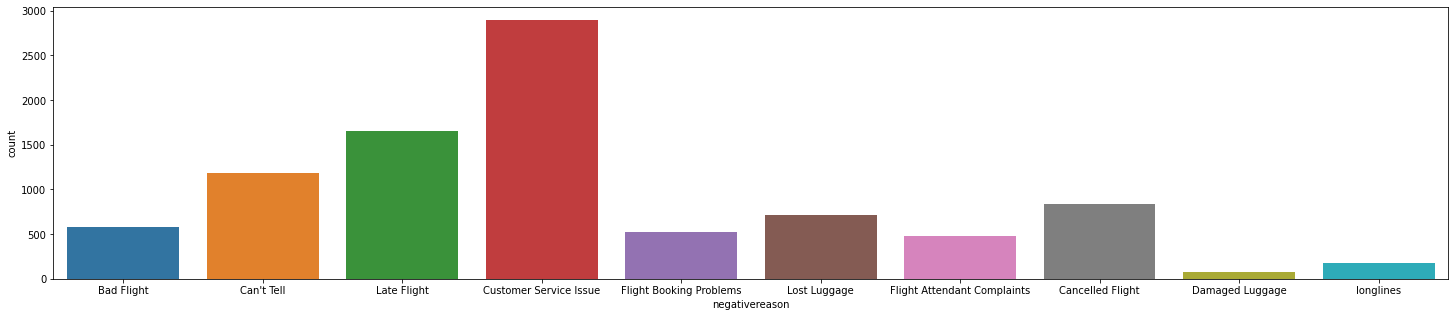

In [28]:
# Check the most common negative reason 

y = tweets_source['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,5)) 
g = sns.countplot(y)


In [29]:
# Seems like the Customer service Issue & late Flight is the most important reason the User is providing the negaive feedback

Text(0, 0.5, 'No. of Tweets')

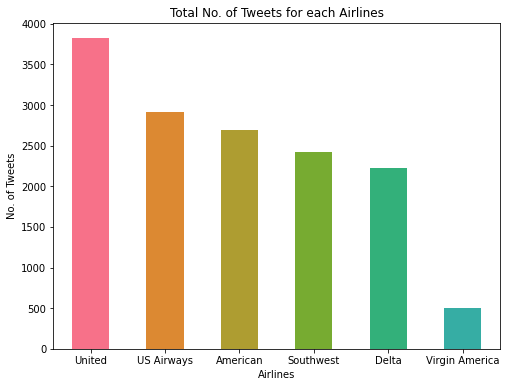

In [30]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 10) 
pd.Series(tweets_source["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [ ]:
# Most tweets are recived towards united 

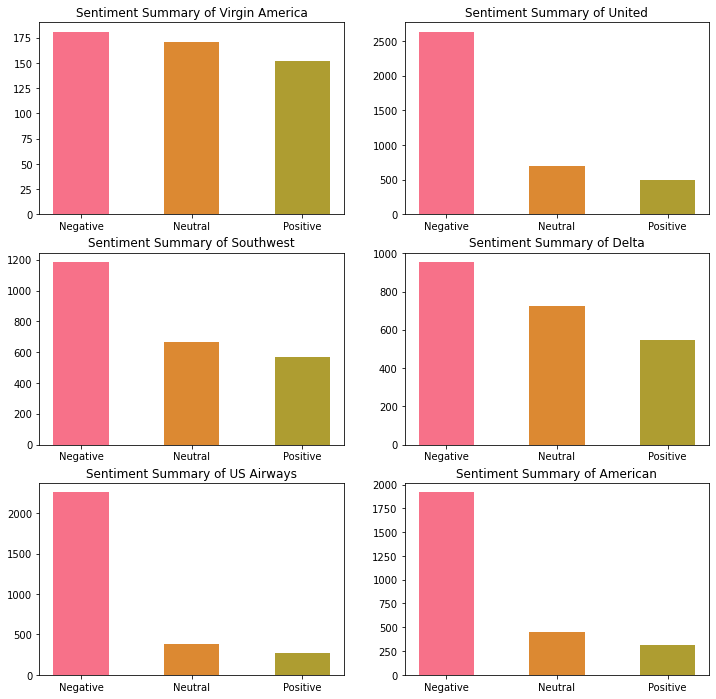

In [32]:
def plot_sub_sentiment(Airline):
    pdf = tweets_source[tweets_source['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = tweets_source['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

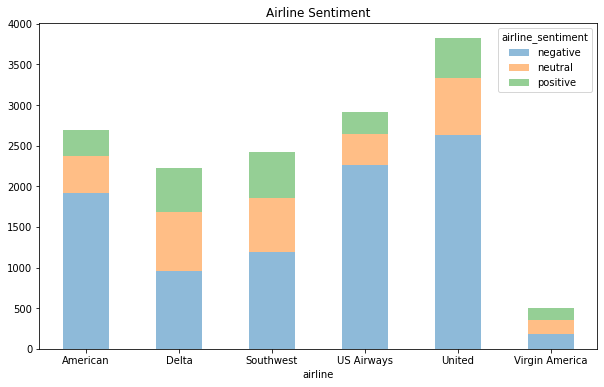

In [33]:
pd.crosstab(index = tweets_source["airline"],columns = tweets_source["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

In [34]:
# United has most number of Negative Tweets

**2. Understand data-columns.**

In [35]:
tweets_source.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [36]:
tweets_data_needed = tweets_source.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

In [37]:
tweets_data_needed.head ()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [38]:
tweets_data_needed.shape

(14568, 2)

In [39]:
print(tweets_data_needed.airline_sentiment.value_counts())

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


**3. Text pre-processing : data Preparation**

In [41]:
# HTML tag removal
def perform_html_cleanup( raw_review ):
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

In [64]:
# Tokenization

def perform_tokenization( raw_review ):
  
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

In [43]:
# Replace contractions 
def replace_contractions(raw_review):
  
    return contractions.fix(raw_review)

In [44]:
# Remove Numbers
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [42]:
# Removal of Special Characters and Punctuations

def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [53]:
def remove_punctuation(words):
   
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [52]:
# Conversion to Lower case

def to_lowercase(words):
 
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [54]:
# Conversion to Lower case

def to_lowercase(words):
 
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [55]:
# Remove empty String

def remove_empty_string(words):
  return list(filter(None, words))

In [56]:
# Stem words in list of tokenized words

def stem_words(words):
    
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [57]:
# Lemmatize verbs in list of tokenized words

def lemmatize_verbs(words):

    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [65]:
# Pre Processing

def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [59]:
tweets_data_needed.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [66]:
clean_reviews = []

for i, row in tweets_data_needed.iterrows():
    words = tweets_data_needed.at[i, 'text']
    words = perform_cleanup (words)
    tweets_data_needed.at[i,'text'] = " ".join( words )
    clean_reviews.append( tweets_data_needed.at[i, 'text'] )
tweets_data_needed.head ()

,airline_sentiment,text
0,neutral,virginameric what dhepburn say
1,positive,virginameric plu you hav ad commerc to the exp...
2,neutral,virginameric i do not today must mean i nee to...
3,negative,virginameric it be real aggress to blast obnox...
4,negative,virginameric and it be a real big bad thing ab...


## **4. Vectorization **

In [67]:

# Initialize the "CountVectorizer" object, from  scikit-learn's
# bag of words tool. 

print ("Creating the bag of words...\n")
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our training data into feature vectors. The input to fit_transform should be a list of  strings.

count_vectorizer_data_features = count_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an array

count_vectorizer_data_features = count_vectorizer_data_features.toarray()

Creating the bag of words...



In [68]:
print (count_vectorizer_data_features.shape)


(14568, 5000)


In [69]:
print(count_vectorizer_data_features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
# Looking at the words in the vocabulary

count_vectorizer_vocab = count_vectorizer.get_feature_names()
print (count_vectorizer_vocab)

['aa', 'aacom', 'aadv', 'aafail', 'aal', 'aano', 'aarp', 'ab', 'abandon', 'abc', 'abcnetwork', 'abl', 'aboard', 'about', 'abov', 'abq', 'abroad', 'absolv', 'absorb', 'absurd', 'abt', 'abus', 'abysm', 'ac', 'acc', 'acceiv', 'access', 'accid', 'accommod', 'accompany', 'accompl', 'accord', 'account', 'accru', 'acct', 'accus', 'achiev', 'acknowledg', 'acquir', 'acquisit', 'across', 'act', 'activitiesprev', 'ad', 'adam', 'addit', 'address', 'addtl', 'adjac', 'adjust', 'admir', 'admit', 'adopt', 'adult', 'adv', 'advert', 'aerojobmarket', 'af', 'affect', 'afford', 'affy', 'afraid', 'aft', 'afteral', 'afternoon', 'ag', 'again', 'against', 'aggrav', 'aggress', 'agnt', 'ago', 'agr', 'agt', 'ah', 'ahead', 'ahhhh', 'ahold', 'ail', 'aim', 'air', 'airb', 'airborn', 'aircanad', 'aircraft', 'airf', 'airlin', 'airlinegeek', 'airnzus', 'airpl', 'airport', 'airway', 'aisl', 'ak', 'al', 'ala', 'alask', 'alaskaair', 'albany', 'albuquerqu', 'alcohol', 'alert', 'alex', 'allend', 'allerg', 'allergy', 'allevy'

In [71]:
# Trying Sum up the counts of each vocabulary word
dist = np.sum(count_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set
for tag, count in zip(count_vectorizer_vocab, dist):
    print (count, tag)

Streaming output truncated to the last 5000 lines.
275 aa
3 aacom
12 aadv
2 aafail
2 aal
2 aano
3 aarp
2 ab
4 abandon
8 abc
3 abcnetwork
126 abl
4 aboard
509 about
18 abov
9 abq
2 abroad
52 absolv
2 absorb
15 absurd
7 abt
3 abus
6 abysm
9 ac
13 acc
55 acceiv
41 access
10 accid
35 accommod
2 accompany
4 accompl
15 accord
87 account
2 accru
12 acct
2 accus
3 achiev
8 acknowledg
2 acquir
2 acquisit
16 across
147 act
2 activitiesprev
138 ad
3 adam
22 addit
52 address
3 addtl
2 adjac
3 adjust
17 admir
6 admit
6 adopt
2 adult
88 adv
11 advert
2 aerojobmarket
2 af
15 affect
16 afford
3 affy
2 afraid
469 aft
2 afteral
30 afternoon
435 ag
391 again
6 against
4 aggrav
3 aggress
2 agnt
131 ago
9 agr
4 agt
13 ah
17 ahead
4 ahhhh
8 ahold
2 ail
2 aim
144 air
8 airb
2 airborn
7 aircanad
33 aircraft
12 airf
553 airlin
3 airlinegeek
2 airnzus
27 airpl
366 airport
89 airway
6 aisl
5 ak
728 al
2 ala
5 alask
2 alaskaair
6 albany
4 albuquerqu
2 alcohol
18 alert
3 alex
2 allend
2 allerg
4 allergy
2 allevy
9

In [72]:
# Initialize the "TfidfVectorizer" object
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our training data into feature vectors. The input to fit_transform should be a list of 

tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an  array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [73]:
print (tfidf_vectorizer_data_features.shape)


(14568, 5000)


In [74]:
print(tfidf_vectorizer_data_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
# Looking at the words in the vocabulary
tfidf_vectorizer_vocab = tfidf_vectorizer.get_feature_names()
print (tfidf_vectorizer_vocab)

['aa', 'aa be', 'aadv', 'abl', 'abl to', 'about', 'about an', 'about it', 'about my', 'about our', 'about the', 'about thi', 'about to', 'about yo', 'about you', 'abov', 'absolv', 'absurd', 'acc', 'acceiv', 'access', 'access to', 'accid', 'accommod', 'accord', 'accord to', 'account', 'account for', 'acct', 'across', 'act', 'ad', 'ad my', 'ad to', 'addit', 'address', 'admir', 'admir club', 'adv', 'adv for', 'advert', 'affect', 'afford', 'aft', 'aft an', 'aft be', 'aft hour', 'aft hrs', 'aft land', 'aft min', 'aft my', 'aft the', 'aft wait', 'afternoon', 'ag', 'ag and', 'ag at', 'ag be', 'ag for', 'ag in', 'ag on', 'ag say', 'ag to', 'again', 'again for', 'again you', 'ago', 'ago and', 'agr', 'ah', 'ahead', 'air', 'aircraft', 'airf', 'airlin', 'airlin again', 'airlin and', 'airlin be', 'airlin ev', 'airlin hav', 'airlin in', 'airlin that', 'airlin to', 'airpl', 'airport', 'airport and', 'airport be', 'airport for', 'airport http', 'airport in', 'airport to', 'airway', 'al', 'al ar', 'al 

In [76]:
# Sum up the counts of each vocabulary word
tf_df_dist = np.sum(tfidf_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab, tf_df_dist):
    print (count, tag)

Streaming output truncated to the last 5000 lines.
52.50737291113176 aa
3.2077692087277407 aa be
3.368793509996405 aadv
25.17507701590429 abl
23.146681141883537 abl to
85.4984273264642 about
3.4198108050579856 about an
7.604627908490814 about it
10.436795623522539 about my
3.100294993511024 about our
14.286230803875045 about the
4.370420233798552 about thi
6.191040746012093 about to
5.774574488095335 about yo
3.937056247221382 about you
5.219202024583754 abov
15.298431581720735 absolv
4.205607401523369 absurd
3.6737634867231477 acc
14.23518141113664 acceiv
10.935998589443571 access
5.3983079913296 access to
3.047366586470728 accid
9.245854464195661 accommod
4.42974522375706 accord
3.118377976126242 accord to
19.921323042120115 account
2.645283801027551 account for
3.342879768538621 acct
4.742683226736029 across
31.437744084188996 act
31.05691299219865 ad
4.695409663745957 ad my
3.8677617672979845 ad to
6.248133259729002 addit
13.29918753128421 address
4.608190740158023 admir
4.05642945

**5. Fit and evaluate model using both type of Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

In [80]:
# Useing Countvectorizer result
x = count_vectorizer_data_features     # Predictor feature columns
y = tweets_data_needed['airline_sentiment']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  

In [83]:
# Applying SMOTE since the data is not balanced

smt = SMOTE(random_state=0)

X_train_SMOTE, y_train_SMOTE = smt.fit_sample(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [84]:
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19266, 5000)
(19266,)


In [85]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)


print(y_validation.shape)


(2185, 5000)
(2186, 5000)
(2185,)


In [86]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

print ("Training the random forest...")
randomforestclassifier = randomforestclassifier.fit( X_train_SMOTE, y_train_SMOTE)

Training the random forest...


In [87]:
randomforestclassifier.score(X_train_SMOTE, y_train_SMOTE)

0.9307069448769854

In [89]:
# Make class predictions for the Validation set
y_validation_predict= randomforestclassifier.predict(x_validation)
print(y_validation_predict)

['negative' 'positive' 'negative' ... 'negative' 'negative' 'negative']


In [90]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier.score(x_validation, y_validation))
print()

Trainig accuracy 0.9307069448769854

Validation accuracy 0.765675057208238



In [91]:
print(metrics.classification_report(y_validation,y_validation_predict))

              precision    recall  f1-score   support

    negative       0.81      0.90      0.86      1331
     neutral       0.62      0.53      0.57       467
    positive       0.73      0.58      0.64       387

    accuracy                           0.77      2185
   macro avg       0.72      0.67      0.69      2185
weighted avg       0.76      0.77      0.76      2185



**Fit evaluate TfidfVectorizer**

In [93]:
x_tf_idf = tfidf_vectorizer_data_features     # Predictor feature columns
y_tf_idf = tweets_data_needed['airline_sentiment']   # Predicted class

x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)  

In [94]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


In [96]:
tf_idf_smt = SMOTE(random_state=0)
X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE = smt.fit_sample(x_train_tf_idf, y_train_tf_idf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [97]:
print(X_train_tf_idf_SMOTE.shape)
print(y_train_tf_idf_SMOTE.shape)

(19266, 5000)
(19266,)


In [98]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)


print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


In [100]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.2s finished


In [101]:
randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


0.9978199937714107

In [105]:
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


Test accuracy 0.7749313815187557



In [102]:
# Make class predictions for the Validation set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [103]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Trainig accuracy 0.9978199937714107

Validation accuracy 0.7803203661327232



[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [104]:
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

              precision    recall  f1-score   support

    negative       0.80      0.92      0.86      1331
     neutral       0.66      0.52      0.58       467
    positive       0.80      0.61      0.69       387

    accuracy                           0.78      2185
   macro avg       0.76      0.68      0.71      2185
weighted avg       0.77      0.78      0.77      2185



**6. Summary**

RandomForestClassifier on CountVectorizer

Trainig accuracy 0.9307069448769854

Testing accuracy 0.7548032936870998

              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      1387
     neutral       0.60      0.49      0.54       465
    positive       0.64      0.55      0.59       334

    accuracy                           0.75      2186
   macro avg       0.69      0.65      0.66      2186
weighted avg       0.74      0.75      0.75      2186



<Figure size 432x288 with 0 Axes>

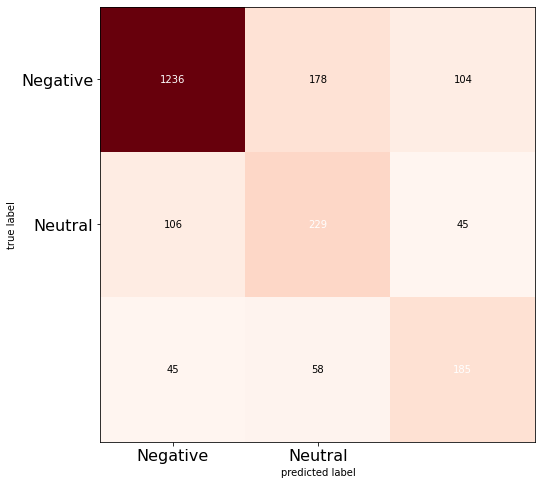

In [106]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

y_test_predict= randomforestclassifier.predict(x_test_main)
print(metrics.classification_report(y_test_main,y_test_predict))

cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

RandomForestClassifier on TfidfVectorizer

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Trainig accuracy 0.9978199937714107



[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Test accuracy 0.7749313815187557



[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1387
     neutral       0.64      0.47      0.54       465
    positive       0.73      0.60      0.66       334

    accuracy                           0.77      2186
   macro avg       0.73      0.66      0.69      2186
weighted avg       0.76      0.77      0.76      2186



<Figure size 432x288 with 0 Axes>

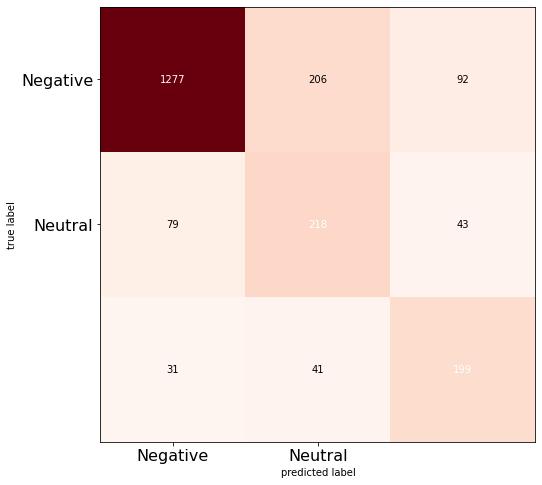

In [107]:


print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


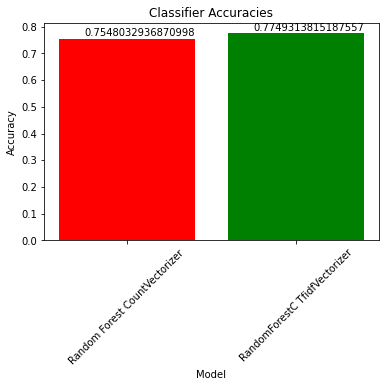

In [109]:
# Performance of both  CountVectorizer and TfidfVectorizer
Accuracy=[]
Model=[]
Accuracy.append(randomforestclassifier.score(x_test_main, y_test_main))
Accuracy.append(randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
Model.append("Random Forest CountVectorizer")
Model.append("RandomForestC TfidfVectorizer")


index=[0,1]
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

xlocs, xlabs = plt.xticks()

for i, v in enumerate(Accuracy):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

